In [31]:
%load_ext autoreload
#To update the imported files

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
%autoreload
import sys
sys.path.insert(0, '../')
from constants import *
from utilities_xgb import *

In [33]:
selected_features = ['date_forecast',
 'absolute_humidity_2m:gm3',
 'air_density_2m:kgm3',
 'clear_sky_energy_1h:J',
 'clear_sky_rad:W',
 'dew_or_rime:idx',
 'dew_point_2m:K',
 'diffuse_rad:W',
 'diffuse_rad_1h:J',
 'direct_rad:W',
 'direct_rad_1h:J',
 'effective_cloud_cover:p',
 'elevation:m',
 'fresh_snow_12h:cm',
 'fresh_snow_1h:cm',
 'fresh_snow_24h:cm',
 'fresh_snow_3h:cm',
 'fresh_snow_6h:cm',
 'is_day:idx',
 'is_in_shadow:idx',
 'msl_pressure:hPa',
 'precip_5min:mm',
 'precip_type_5min:idx',
 'pressure_100m:hPa',
 'pressure_50m:hPa',
 'prob_rime:p',
 'rain_water:kgm2',
 'relative_humidity_1000hPa:p',
 'sfc_pressure:hPa',
 'snow_depth:cm',
 'snow_drift:idx',
 'snow_melt_10min:mm',
 'snow_water:kgm2',
 'sun_azimuth:d',
 'sun_elevation:d',
 'super_cooled_liquid_water:kgm2',
 't_1000hPa:K',
 'total_cloud_cover:p',
 'visibility:m',
 'wind_speed_10m:ms',
 'wind_speed_u_10m:ms',
 'wind_speed_v_10m:ms',
 'wind_speed_w_1000hPa:ms']
hyperparameters = {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.7}

In [ ]:
xgb_a = XGB_model(hyperparameters, X_observed_a, X_estimated_a, y_a, selected_features)
xgb_a.fit()
xgb_a.pred()

xgb_b = XGB_model(hyperparameters, X_observed_b, X_estimated_b, y_b, selected_features)
xgb_b.fit()
xgb_b.pred()

xgb_c = XGB_model(hyperparameters, X_observed_c, X_estimated_c, y_c, selected_features)
xgb_c.fit()
xgb_c.pred()

/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype)

In [ ]:
#Evaluate mean asbolute error
mae_a = xgb_a.mae()
print("A: Mean Absolute Error:", mae_a)

mae_b = xgb_b.mae()
print("B: Mean Absolute Error:", mae_b)

mae_c = xgb_c.mae()
print("C: Mean Absolute Error:", mae_c)

A: Mean Absolute Error: 177.9697346595688
B: Mean Absolute Error: 48.12138084940056
C: Mean Absolute Error: 22.18744532958096


Pearson correlation: 0.93


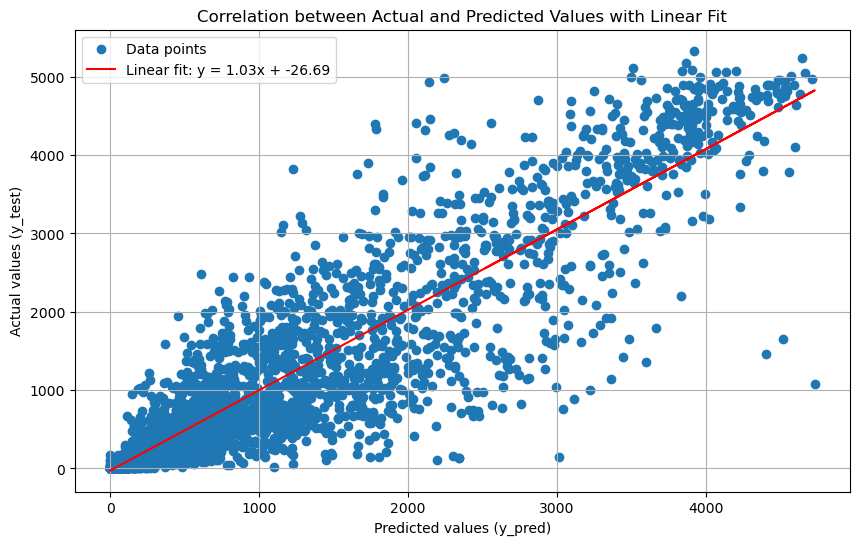

In [ ]:
xgb_a.corr_plot()

In [ ]:
xgb_a.pred(X_test_a)
xgb_b.pred(X_test_b)
xgb_c.pred(X_test_c)

y_pred_xgb_test = np.concatenate((xgb_a.prediction, xgb_b.prediction, xgb_c.prediction), axis=0)
y_pred_xgb_valid = np.concatenate((xgb_a.pred_estimated, xgb_b.pred_estimated, xgb_c.pred_estimated), axis=0)

/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype)

ValueError: feature_names mismatch: ['index', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3', 'clear_sky_energy_1h:J', 'dew_or_rime:idx', 'dew_point_2m:K', 'diffuse_rad_1h:J', 'direct_rad_1h:J', 'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm', 'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm', 'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx', 'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx', 'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p', 'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa', 'snow_depth:cm', 'snow_drift:idx', 'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d', 'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K', 'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms', 'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms', 'wind_speed_w_1000hPa:ms', 'month', 'hour', 'day', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos'] ['absolute_humidity_2m:gm3', 'air_density_2m:kgm3', 'clear_sky_energy_1h:J', 'dew_or_rime:idx', 'dew_point_2m:K', 'diffuse_rad_1h:J', 'direct_rad_1h:J', 'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm', 'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm', 'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx', 'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx', 'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p', 'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa', 'snow_depth:cm', 'snow_drift:idx', 'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d', 'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K', 'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms', 'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms', 'wind_speed_w_1000hPa:ms', 'month', 'hour', 'day', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos']
expected index in input data